## Sheet #4: Density Transformations & Random Number Generation - Luke Longren & Angela Mitrovska 

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import numpy.linalg as LA

In [2]:
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')
plt.rcParams.update({'font.size': 12})
plt.rcParams["figure.figsize"] = (12,8)

## Exercise 4.1: Inverse CDF and Random Number Generation

### (a) Derive a formula to generate samples of a scalar random variable with a Laplacian distribution 
### from uniformly distributed random numbers.

The pdf of a Laplace distribution:

## <font color = 'black'> $ p_X(x) = \frac{1}{2b} exp(- \frac{|x - \mu|}{b}) $

In [3]:
def laplace_pdf(x, mu, b):
    return (1/(2*b)) * np.exp(-abs(x-mu)/b)

1. Compute the cdf $F_X(x)$ of the desired pdf $p_X(x)$:

## <font color = 'black'> $ F_X(x) = P(X \leq x) = \int_{-\infty}^{x} p(y) dy = \int_{-\infty}^{x} \frac{1}{2b} exp(- \frac{|y - \mu|}{b}) dy $ 

This can be broken into two cases, where $x \leq \mu$ and $x \geq \mu$, and solved, giving:

## <font color = 'black'> $ F_X(x) = \frac{1}{2} exp(\frac{x - \mu}{b}) $ for $x \leq \mu$,

## <font color = 'black'> $ F_X(x) = 1 - \frac{1}{2} exp(- \frac{x - \mu}{b}) $ for $x \geq \mu $

In [4]:
def laplace_cdf(x, mu, b):  # the cumulative distribution function (cdf)
    if x > mu:
        F = 1 - 0.5 * np.exp(-(x-mu)/b)
    else:
        F = 0.5 * np.exp((x-mu)/b)
    return F

2. Determine the inverse transformation $F^{-1}$:

## <font color = 'black'> $ F_X^{-1}(z) = \mu - b \ sgn(z - \frac{1}{2}) \ ln(1 - 2|z-\frac{1}{2}|) $

In [5]:
def inv_laplace_cdf(z, mu, b):  # the inverse cdf of a Laplace distribution
    if z - 0.5 > 0:
        sgn = 1
    else:
        sgn = -1
    return mu - b * sgn * np.log(1 - 2 * abs(z-0.5))

### (b) Implement your procedure for verification and generate 500 samples for a Laplacian random variable $X$ with a specific mean $µ = 1$ and scale parameter $b = 2$. Plot a density estimate for these samples overlayed with the pdf $p_X(x)$ from above.

3. Sample uniformly distributed numbers (in [0, 1]), $\tilde{z}$:

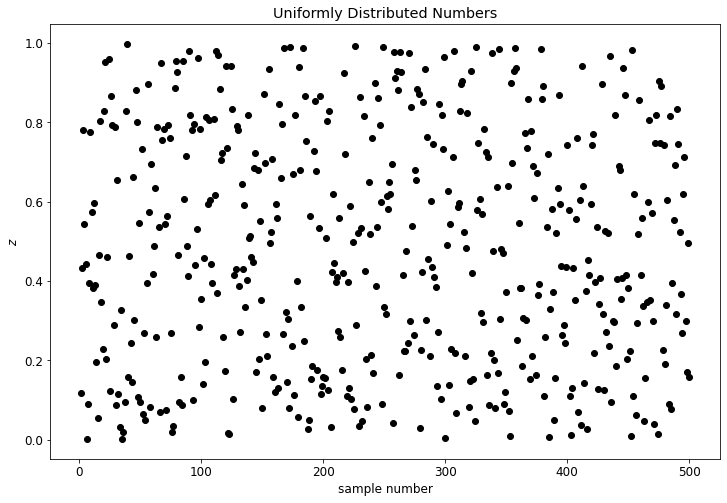

In [6]:
sample_size = 500
z = np.random.uniform(low=0, high=1, size=sample_size)  # create random samples
plt.scatter(np.linspace(1, sample_size, sample_size), z, color='k')
plt.title('Uniformly Distributed Numbers')
plt.xlabel('sample number')
plt.ylabel('$z$')
plt.show()

4. Get the samples $\tilde{x} = F^{−1} (\tilde{z})$ from $X$:

In [7]:
samples_x = np.zeros(sample_size)
for i in range(sample_size):
    samples_x[i] = inv_laplace_cdf(z=z[i], mu=1, b=2)

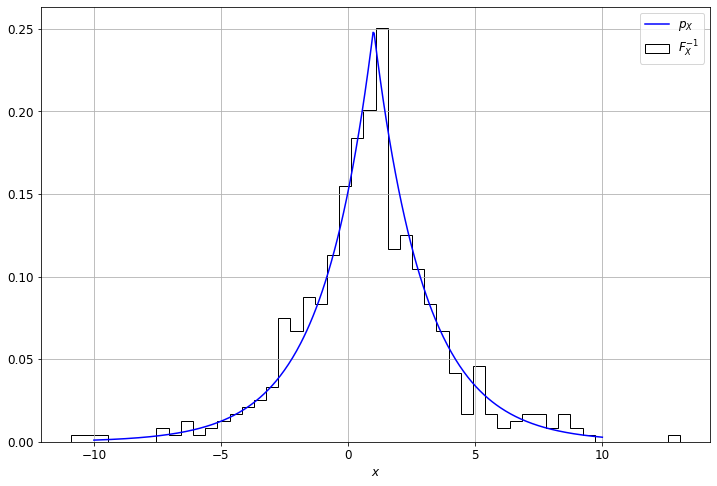

In [8]:
x_range = np.linspace(-10, 10, 500)
plt.plot(x_range, laplace_pdf(x=x_range, mu=1, b=2), color='b', label='$p_X$')
plt.hist(samples_x, color='k', histtype='step', bins=sample_size//10, density=True, label='$F^{-1}_X$')
plt.xlabel('$x$')
plt.legend()
plt.grid()
plt.show()

## Exercise 4.2: Density Transformations

### (a) Consider the density of a random variable $X$ to be $p_X(x) = e^{−x}, x ≥ 0$. For the change of variables $u = u(x) = e^{-x}$ calculate the density $p_u(X)(u)$ of the random variable $u(X)$.

Given the following:

## <font color = 'black'> $ \int_{\Omega} f(\bar{x}) d\bar{x} = \int_{u(\Omega)} f(\bar{x}(\bar{u})) \frac{1}{|det \frac{\partial \bar{u}(\bar{x})}{\partial \bar{x}}|} $

## <font color = 'black'> $ p_X(\bar{x}) = p_{u(X)}(\bar{u}) \frac{1}{|det \frac{\partial \bar{u}(\bar{x})}{\partial \bar{x}}|} $

## <font color = 'black'> $ p_{u(X)}(\bar{u}) =  p_X(\bar{x}) |det \frac{\partial \bar{x}(\bar{u})}{\partial \bar{u}}| $

## <font color = 'black'> $ p_{u(X)}(u) = e^{-x} (|det \frac{\partial}{\partial x} e^{-x}|)^{-1} = e^{-x} (|- e^{-x}|)^{-1} = 1 $

### (b) Consider two independent and uniformly in the interval $[0, 1]$ distributed random variables $(X_1, X_2)^T =: \bar{X}$. The pdf is given by $p_\bar{X}(x_1, x_2) = 1$ in $[0, 1]^2$ and zero otherwise. Consider the variable transformation $\bar{u} = \bar{u}(\bar{x})$ with $u_1(\bar{x}) = \sqrt{−2 ln x_1} cos(2πx_2)$ and $u_2(\bar{x}) = \sqrt{−2 ln x_1} sin(2πx_2)$. Show that $\bar{u}(\bar{X})$ corresponds to two independent unit-variance zero-mean normally distributed random variables.

## <font color = 'black'> $ p_{u(X)}(\bar{u}) =  p_X(\bar{x}) |det \frac{\partial \bar{x}(\bar{u})}{\partial \bar{u}}| =  p_X(\bar{x}) \frac{1}{|det \frac{\partial \bar{u}(\bar{x})}{\partial \bar{x}}|} $

## <font color = 'black'> $ p_{u(X)}(\bar{u}) =  1 * | det[\frac{\partial u_1}{\partial x_1} \ \frac{\partial u_1}{\partial x_2}, \frac{\partial u_2}{\partial x_1} \ \frac{\partial u_2}{\partial x_2} ] |^{-1} $

## <font color = 'black'> $ p_{u(X)}(\bar{u}) = | det[\frac{-2}{x_1}\frac{1}{2}(-2 ln(x_1))^{-1/2} cos(2 \pi x_2) \ \ \   \sqrt{2 ln(x_1)} 2\pi sin(2 \pi x_2) \\ \frac{-2}{x_1}\frac{1}{2}(-2 ln(x_1))^{-1/2} sin(2 \pi x_2) \ \ \   \sqrt{2 ln(x_1)} 2\pi cos(2 \pi x_2) ] |^{-1} $

## <font color = 'black'> $ p_{u(X)}(\bar{u}) = | \frac{-2\pi cos^2(2\pi x_2)}{x_1} - \frac{-2\pi sin^2(2\pi x_2)}{x_1}|^{-1} = \frac{x_1}{2 \pi} (sin^2(2 \pi x_2) + cos^2(2 \pi x_2))^{-1}$

## <font color = 'black'> $ p_{u(X)}(\bar{u}) = \frac{x_1}{2\pi} $

This shows that the probability density function $p_{u(X)}(\bar{u})$ is only dependent upon $x_1$, thus the two variables $\bar{X}$ are independent.

I also read, after doing the above, that random variables $X_1,...,X_n$ are independent from each other if the following holds:

## <font color = 'black'> ${\displaystyle f_{X_{1},\ldots ,X_{n}}(x_{1},\ldots ,x_{n})=f_{X_{1}}(x_{1})\cdots f_{X_{n}}(x_{n})}$

But yeah, we can do this with code instead:

In [9]:
def u_1(x1, x2):
    return np.sqrt(-2*np.log(x1)) * np.cos(2*np.pi*x2)

In [10]:
def u_2(x1, x2):
    return np.sqrt(-2*np.log(x1)) * np.sin(2*np.pi*x2)

In [11]:
sample_size = 500  # create random samples
np.random.seed(111)
X = [np.random.uniform(low=0, high=1, size=sample_size), np.random.uniform(low=0, high=1, size=sample_size)]

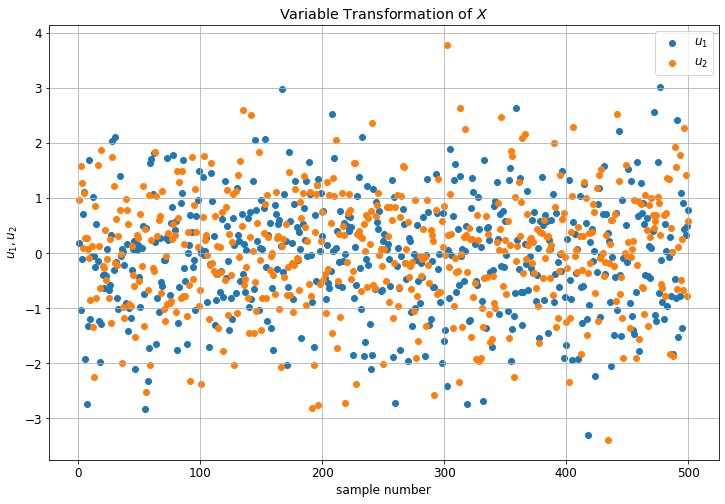

In [12]:
plot_range = np.linspace(1, sample_size, sample_size)
u1 = u_1(X[0], X[1])
u2 = u_2(X[0], X[1])
plt.scatter(plot_range, u1, label='$u_1$')
plt.scatter(plot_range, u2, label='$u_2$')
plt.title('Variable Transformation of $X$')
plt.ylabel('$u_1, u_2$')
plt.xlabel('sample number')
plt.legend()
plt.grid()
plt.show()

In [13]:
sample_sizes = np.logspace(1, 5, 10)
mean_u1 = np.zeros(len(sample_sizes))
mean_u2 = np.zeros(len(sample_sizes))
for i in range(len(sample_sizes)):
    sample_size = int(sample_sizes[i])
    np.random.seed(111)
    X = [np.random.uniform(low=0, high=1, size=sample_size), 
         np.random.uniform(low=0, high=1, size=sample_size)]
    u1 = u_1(X[0], X[1])
    u2 = u_2(X[0], X[1])
    mean_u1[i] = np.mean(u1)
    mean_u2[i] = np.mean(u2)

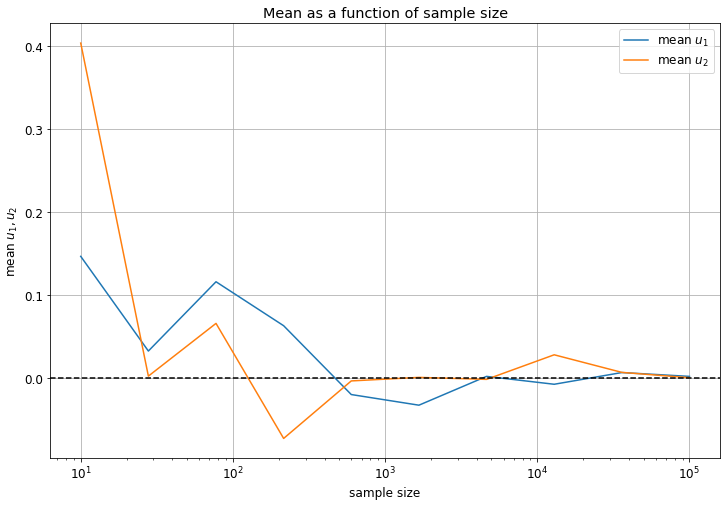

In [14]:
plt.plot(sample_sizes, mean_u1, label='mean $u_1$')
plt.plot(sample_sizes, mean_u2, label='mean $u_2$')
plt.axhline(0, color='k', linestyle='--')
plt.title('Mean as a function of sample size')
plt.ylabel('mean $u_1, u_2$')
plt.xlabel('sample size')
plt.xscale('log')
plt.legend()
plt.grid()
plt.show()

This shows that for a high sample size, the variables have zero-mean.

In [15]:
sample_sizes = np.logspace(1, 5, 10)
var_u1 = np.zeros(len(sample_sizes))
var_u2 = np.zeros(len(sample_sizes))
for i in range(len(sample_sizes)):
    sample_size = int(sample_sizes[i])
    np.random.seed(111)
    X = [np.random.uniform(low=0, high=1, size=sample_size), 
         np.random.uniform(low=0, high=1, size=sample_size)]
    u1 = u_1(X[0], X[1])
    u2 = u_2(X[0], X[1])
    var_u1[i] = np.var(u1)
    var_u2[i] = np.var(u2)

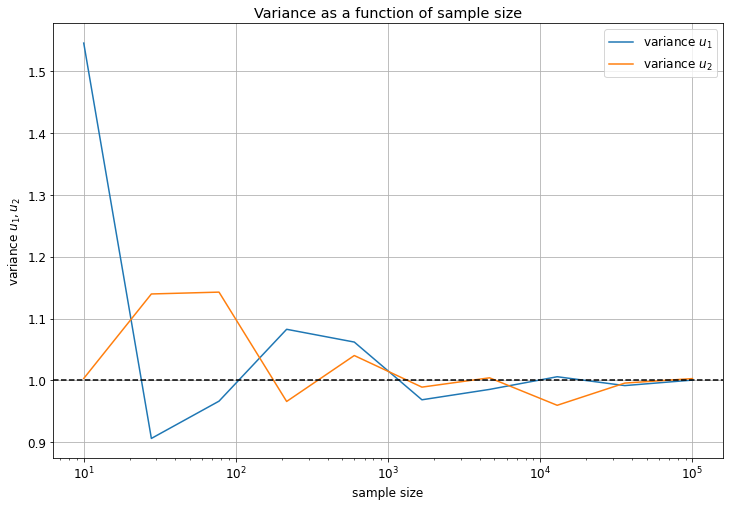

In [16]:
plt.plot(sample_sizes, var_u1, label='variance $u_1$')
plt.plot(sample_sizes, var_u2, label='variance $u_2$')
plt.axhline(1, color='k', linestyle='--')
plt.title('Variance as a function of sample size')
plt.ylabel('variance $u_1, u_2$')
plt.xlabel('sample size')
plt.xscale('log')
plt.legend()
plt.grid()
plt.show()

This shows that for a high sample size, the variables have unit-variance.

In [17]:
def gaussian(x, a, b, c):
    return a * np.exp(-(x-b)**2/(2*c**2))

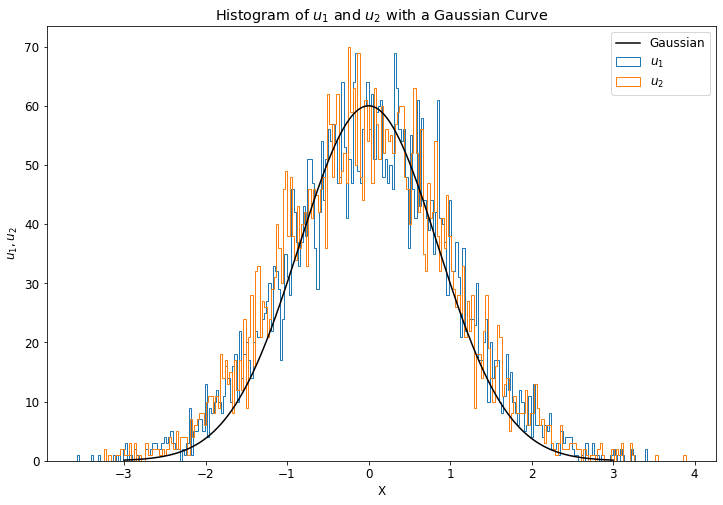

In [18]:
sample_size = 5000
x_range = np.linspace(-3, 3, sample_size)
X = [np.random.uniform(low=0, high=1, size=sample_size), np.random.uniform(low=0, high=1, size=sample_size)]
u1 = u_1(X[0], X[1])
u2 = u_2(X[0], X[1])
plt.hist(u1, histtype='step', bins=int(sample_size/20), label='$u_1$')
plt.hist(u2, histtype='step', bins=int(sample_size/20), label='$u_2$')
plt.plot(x_range, gaussian(x=x_range, a=60, b=0, c=0.85), label='Gaussian', color='k')
plt.title('Histogram of $u_1$ and $u_2$ with a Gaussian Curve')
plt.ylabel('$u_1, u_2$')
plt.xlabel('X')
plt.legend()
plt.show()

Fitting a Gaussian function to the variables shows that they are normally distributed.

### (c) Outline how to generalize the last result to $N$ dimensions. Use the following:
### • Any symmetric positive semidefinite matrix (such as the covariance matrix $\bar{Σ}$) has a Cholesky decomposition $\bar{Σ} = \bar{L}\bar{L}^T$ (and that can be easily computed numerically).
### • If $\bar{L}$ is a constant matrix and $\bar{X}$ a random vector then $Cov(\bar{L} \bar{X}) = \bar{L} Cov(\bar{X})\bar{L}^T$.
### • The covariance matrix of independent unit-variance Gaussian variables is identity, i.e., $Cov(\bar{X}) = \bar{I}$.
### Confirm that the above properties hold for your solution (a detailed proof is not necessary).

In [19]:
# construct a random symmetric positive semidefinite matrix
matrix_size = 4
rand_matrix = sp.random.rand(matrix_size, matrix_size)
rand_matrix = np.dot(rand_matrix, rand_matrix.T)
print(rand_matrix, 'symmetric positive semidefinite matrix')

[[1.19228329 0.66422013 0.47822514 0.8908365 ]
 [0.66422013 0.41430344 0.48460958 0.6939416 ]
 [0.47822514 0.48460958 1.55391471 1.65767674]
 [0.8908365  0.6939416  1.65767674 1.91928003]] symmetric positive semidefinite matrix


In [20]:
cholesky = LA.cholesky(rand_matrix)
print(cholesky, 'Cholesky decomposition')

[[1.09191725 0.         0.         0.        ]
 [0.60830629 0.210397   0.         0.        ]
 [0.4379683  1.03704285 0.53538829 0.        ]
 [0.81584617 0.93944894 0.60911529 0.00945096]] Cholesky decomposition


Calculate the covariance both ways, i.e. both sides of: $Cov(\bar{L} \bar{X}) = \bar{L} Cov(\bar{X})\bar{L}^T$

In [21]:
const_matrix = np.ones((matrix_size, matrix_size))  # a constant matrix?
X = np.random.sample(matrix_size)  # random vector
print(X, 'a random vector')

[0.6621598  0.71164254 0.41634116 0.35228281] a random vector


Should both be the same value.

In [22]:
# left hand side
LHS = np.cov(np.dot(const_matrix, X))
# print(LHS, 'left hand side')

In [23]:
# right hand side
RHS = np.dot(const_matrix, np.cov(X)) @ const_matrix.T
# print(RHS, 'right hand side')

The covariance matrix of independent unit-variance Gaussian variables:

In [24]:
X_normal = np.random.normal(size=50000)
cov_variables = np.cov(X_normal)
print(cov_variables)

0.9920337363910918


Increasing the size of the sample makes the covariance approach a value of one, thus is identity.